In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("emirates1.csv")

Lets drop the zero values after 865 onwards. 

In [7]:
df.drop(df.index[865:],inplace=True)

In [9]:
#See a wider output of the tweet
pd.set_option('display.max_colwidth', -1)

In [10]:
df.head()

,text
0,"@NewfieldWay We're sorry to hear about this, can you tell us more details about what happened? Please share it via… https://t.co/F9D8sEKV07"
1,"@withPaballo We're sorry about this, Paballo. We've replied to your DM. Thanks."
2,@Robert11111116 @emirates @EmiratesSupport I can tell that was taken on an android phone. Looks tasty thoooooo
3,"@EmiratesSupport Forgot phone in front pocket of EK513 5/6/2019, DEL-DUB. Realized in around 7 min of getting off,… https://t.co/tuG2WBYzvM"
4,@moss_hyy @emirates @EmiratesSupport this was back in april. i went to singapore but im back now! :)


In [18]:
#Remove twitter handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [19]:
#Remove twitter handles
df['tidy_tweet'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [20]:
df.head()

,text,tidy_tweet
0,"@NewfieldWay We're sorry to hear about this, can you tell us more details about what happened? Please share it via… https://t.co/F9D8sEKV07","We're sorry to hear about this, can you tell us more details about what happened? Please share it via… https://t.co/F9D8sEKV07"
1,"@withPaballo We're sorry about this, Paballo. We've replied to your DM. Thanks.","We're sorry about this, Paballo. We've replied to your DM. Thanks."
2,@Robert11111116 @emirates @EmiratesSupport I can tell that was taken on an android phone. Looks tasty thoooooo,I can tell that was taken on an android phone. Looks tasty thoooooo
3,"@EmiratesSupport Forgot phone in front pocket of EK513 5/6/2019, DEL-DUB. Realized in around 7 min of getting off,… https://t.co/tuG2WBYzvM","Forgot phone in front pocket of EK513 5/6/2019, DEL-DUB. Realized in around 7 min of getting off,… https://t.co/tuG2WBYzvM"
4,@moss_hyy @emirates @EmiratesSupport this was back in april. i went to singapore but im back now! :),this was back in april. i went to singapore but im back now! :)


In [30]:
#Removing short words from Tweets
df['tidy_tweet'] = df['tidy_tweet'].apply(lambda x: ' '.join ([w for w in x.split() if len(w)>3]))

In [31]:
#Function to remove URL 
def url_clean(text):
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''',
                  "", 
                  text)

In [32]:
df['tweet_no_url'] = df['tidy_tweet'].apply(lambda x: url_clean(x))

In [33]:
df.head()

,text,tidy_tweet,tweet_no_url
0,"@NewfieldWay We're sorry to hear about this, can you tell us more details about what happened? Please share it via… https://t.co/F9D8sEKV07","We're sorry hear about this, tell more details about what happened? Please share via… https://t.co/F9D8sEKV07","We're sorry hear about this, tell more details about what happened? Please share via…"
1,"@withPaballo We're sorry about this, Paballo. We've replied to your DM. Thanks.","We're sorry about this, Paballo. We've replied your Thanks.","We're sorry about this, Paballo. We've replied your Thanks."
2,@Robert11111116 @emirates @EmiratesSupport I can tell that was taken on an android phone. Looks tasty thoooooo,tell that taken android phone. Looks tasty thoooooo,tell that taken android phone. Looks tasty thoooooo
3,"@EmiratesSupport Forgot phone in front pocket of EK513 5/6/2019, DEL-DUB. Realized in around 7 min of getting off,… https://t.co/tuG2WBYzvM","Forgot phone front pocket EK513 5/6/2019, DEL-DUB. Realized around getting off,… https://t.co/tuG2WBYzvM","Forgot phone front pocket EK513 5/6/2019, DEL-DUB. Realized around getting off,…"
4,@moss_hyy @emirates @EmiratesSupport this was back in april. i went to singapore but im back now! :),this back april. went singapore back now!,this back april. went singapore back now!


### World Cloud

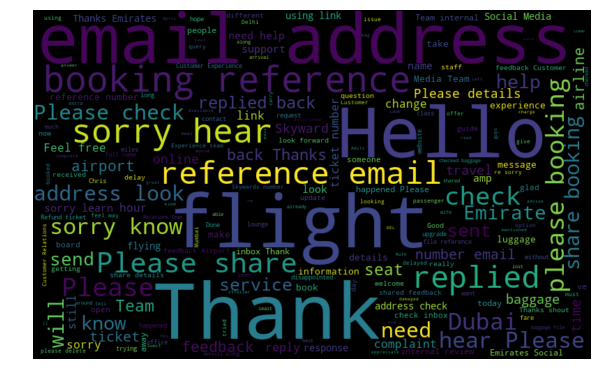

In [34]:
# World Cloud
all_words = ' '.join([text for text in df['tweet_no_url']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Working with different dataframe without EMIRATES responses

In [37]:
df3 = pd.read_csv("tweet_df")

In [38]:
df3.head()

,Unnamed: 0,User,Tweet
0,0,ChrisSavides,@EmiratesSupport why did you outsource your checkin and ground staff at schiphol? The Denate team has seriously dropped your standards
1,1,BelleeScaaarlet,"@EmiratesSupport help I booked flights to Sri Lanka last Tuesday and now the FCO advise no one to travel there, can I get a refund?"
2,2,Janammoorthy,"@EmiratesSupport I booked a flight to Sri Lanka in July, following onto the incidents in Sri Lanka, I no longer to… https://t.co/N4nhDLeLSu"
3,3,RanitRoyChowdh,@EmiratesSupport \nNeed a help. Will be travelling from Singapore to London Heathrow/Stansted. What is the baggage a… https://t.co/Xj64gqwx8y
4,4,MarketingHE,@PhilipCragg @EmiratesSupport @emirates Please share


In [39]:
df3['new_tweet'] = np.vectorize(remove_pattern)(df3['Tweet'], "@[\w]*")

In [40]:
df3.head()

,Unnamed: 0,User,Tweet,new_tweet
0,0,ChrisSavides,@EmiratesSupport why did you outsource your checkin and ground staff at schiphol? The Denate team has seriously dropped your standards,why did you outsource your checkin and ground staff at schiphol? The Denate team has seriously dropped your standards
1,1,BelleeScaaarlet,"@EmiratesSupport help I booked flights to Sri Lanka last Tuesday and now the FCO advise no one to travel there, can I get a refund?","help I booked flights to Sri Lanka last Tuesday and now the FCO advise no one to travel there, can I get a refund?"
2,2,Janammoorthy,"@EmiratesSupport I booked a flight to Sri Lanka in July, following onto the incidents in Sri Lanka, I no longer to… https://t.co/N4nhDLeLSu","I booked a flight to Sri Lanka in July, following onto the incidents in Sri Lanka, I no longer to… https://t.co/N4nhDLeLSu"
3,3,RanitRoyChowdh,@EmiratesSupport \nNeed a help. Will be travelling from Singapore to London Heathrow/Stansted. What is the baggage a… https://t.co/Xj64gqwx8y,\nNeed a help. Will be travelling from Singapore to London Heathrow/Stansted. What is the baggage a… https://t.co/Xj64gqwx8y
4,4,MarketingHE,@PhilipCragg @EmiratesSupport @emirates Please share,Please share


In [41]:
df3['new_tweet'] = df3['new_tweet'].apply(lambda x: url_clean(x))

In [42]:
df3.head()

,Unnamed: 0,User,Tweet,new_tweet
0,0,ChrisSavides,@EmiratesSupport why did you outsource your checkin and ground staff at schiphol? The Denate team has seriously dropped your standards,why did you outsource your checkin and ground staff at schiphol? The Denate team has seriously dropped your standards
1,1,BelleeScaaarlet,"@EmiratesSupport help I booked flights to Sri Lanka last Tuesday and now the FCO advise no one to travel there, can I get a refund?","help I booked flights to Sri Lanka last Tuesday and now the FCO advise no one to travel there, can I get a refund?"
2,2,Janammoorthy,"@EmiratesSupport I booked a flight to Sri Lanka in July, following onto the incidents in Sri Lanka, I no longer to… https://t.co/N4nhDLeLSu","I booked a flight to Sri Lanka in July, following onto the incidents in Sri Lanka, I no longer to…"
3,3,RanitRoyChowdh,@EmiratesSupport \nNeed a help. Will be travelling from Singapore to London Heathrow/Stansted. What is the baggage a… https://t.co/Xj64gqwx8y,\nNeed a help. Will be travelling from Singapore to London Heathrow/Stansted. What is the baggage a…
4,4,MarketingHE,@PhilipCragg @EmiratesSupport @emirates Please share,Please share


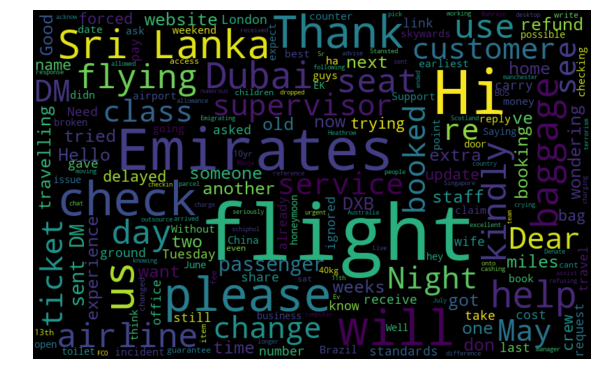

In [43]:
#wordcloud on DF3
all_words = ' '.join([text for text in df3['new_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
from textblob import TextBlob

In [48]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())


def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [49]:
# We create a column with the result of the analysis:
df3['SA'] = np.array([ analize_sentiment(tweet) for tweet in df3['new_tweet'] ])

# We display the updated dataframe with the new column:
display(df3.head(10))

,Unnamed: 0,User,Tweet,new_tweet,SA
0,0,ChrisSavides,@EmiratesSupport why did you outsource your checkin and ground staff at schiphol? The Denate team has seriously dropped your standards,why did you outsource your checkin and ground staff at schiphol? The Denate team has seriously dropped your standards,-1
1,1,BelleeScaaarlet,"@EmiratesSupport help I booked flights to Sri Lanka last Tuesday and now the FCO advise no one to travel there, can I get a refund?","help I booked flights to Sri Lanka last Tuesday and now the FCO advise no one to travel there, can I get a refund?",0
2,2,Janammoorthy,"@EmiratesSupport I booked a flight to Sri Lanka in July, following onto the incidents in Sri Lanka, I no longer to… https://t.co/N4nhDLeLSu","I booked a flight to Sri Lanka in July, following onto the incidents in Sri Lanka, I no longer to…",0
3,3,RanitRoyChowdh,@EmiratesSupport \nNeed a help. Will be travelling from Singapore to London Heathrow/Stansted. What is the baggage a… https://t.co/Xj64gqwx8y,\nNeed a help. Will be travelling from Singapore to London Heathrow/Stansted. What is the baggage a…,0
4,4,MarketingHE,@PhilipCragg @EmiratesSupport @emirates Please share,Please share,0
5,5,KerrySiddons,@EmiratesSupport are charging us £300 JUST to change our flights. That's also before a flight difference charge! Ev… https://t.co/MWWBY6jN7K,are charging us £300 JUST to change our flights. That's also before a flight difference charge! Ev…,0
6,6,HEBusiness,@EmiratesSupport I've tried the Emirates office in Bahrain my wife ended up crying with the manager refusing to com… https://t.co/vmp67WNxwl,I've tried the Emirates office in Bahrain my wife ended up crying with the manager refusing to com…,-1
7,7,HEBusiness,@EmiratesSupport Why are Emirates cashing in on the terrorism in Sri Lanka? We've tried to change our flights to Sr… https://t.co/nPNBpCX90C,Why are Emirates cashing in on the terrorism in Sri Lanka? We've tried to change our flights to Sr…,0
8,8,Carolin29708064,@EmiratesSupport We have already sent claims into the link you gave us and have been ignored numerous times . Your… https://t.co/KCxS9IxJ7H,We have already sent claims into the link you gave us and have been ignored numerous times . Your…,0
9,9,oRoseyo,"Hi @EmiratesSupport - Live chat not working, can we get some help knowing our baggage allowance please?","Hi - Live chat not working, can we get some help knowing our baggage allowance please?",1


In [51]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(df3['new_tweet']) if df3['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df3['new_tweet']) if df3['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df3['new_tweet']) if df3['SA'][index] < 0]

In [52]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df3['new_tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df3['new_tweet'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(df3['new_tweet'])))

Percentage of positive tweets: 31.0%
Percentage of neutral tweets: 52.0%
Percentage de negative tweets: 17.0%
